# Multiclass Classification and Neural Networks

usefull links : [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html] 


In [22]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [23]:

print("[X] downloading data...")
mnist = datasets.fetch_mldata("MNIST Original")

[X] downloading data...


In [24]:
print('mnist data shape : ', mnist.data.shape)
print('mnist target shape : ', mnist.target.shape)

mnist data shape :  (70000, 784)
mnist target shape :  (70000,)


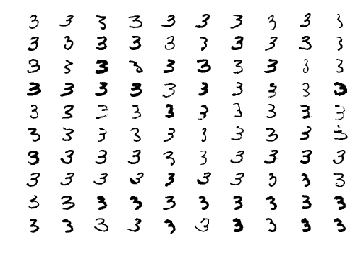

In [25]:
for i in range(10*10):
    plt.subplot(10,10,i+1)
    img = mnist.data[i+20000].reshape(28,28)
    plt.axis('off')
    plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()